## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

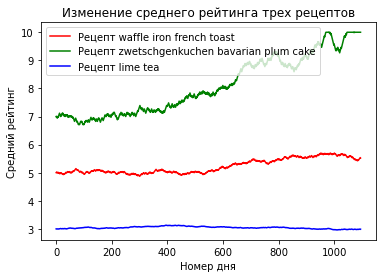

In [58]:
data = np.load('average_ratings.npy')
fig, ax = plt.subplots()
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
colors = ['red', 'green', 'blue']
ax.plot(data[0,:], color=colors[0], label=f'Рецепт waffle iron french toast')
ax.plot(data[1,:], color=colors[1], label=f'Рецепт zwetschgenkuchen bavarian plum cake')
ax.plot(data[2,:], color=colors[2], label=f'Рецепт lime tea')
ax.legend()
plt.show()

In [3]:
data

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


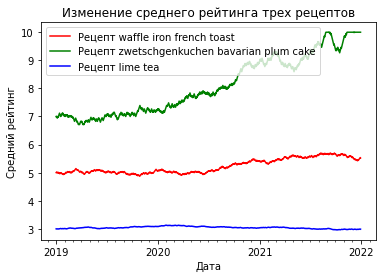

In [57]:
data = np.load('average_ratings.npy')
fig, ax = plt.subplots()
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
colors = ['red', 'green', 'blue']
dates = pd.date_range('2019-01-01', '2021-12-30', freq='D')
ax.plot(dates, data[0,:], color=colors[0], label=f'Рецепт waffle iron french toast')
ax.plot(dates, data[1,:], color=colors[1], label=f'Рецепт zwetschgenkuchen bavarian plum cake')
ax.plot(dates, data[2,:], color=colors[2], label=f'Рецепт lime tea')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

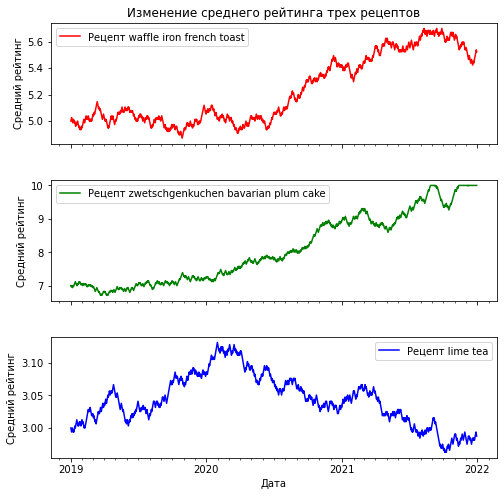

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 8))
plt.subplots_adjust(hspace=0.3)
ax1.set_title('Изменение среднего рейтинга трех рецептов')
ax1.set_ylabel('Средний рейтинг')
ax1.plot(dates, data[0,:], color='red', label='Рецепт waffle iron french toast')
ax1.legend()

ax2.set_ylabel('Средний рейтинг')
ax2.plot(dates, data[1,:], color='green', label='Рецепт zwetschgenkuchen bavarian plum cake')
ax2.legend()

ax3.set_ylabel('Средний рейтинг')
ax3.plot(dates, data[2,:], color='blue', label='Рецепт lime tea')
ax3.legend()
ax3.set_xlabel('Дата')
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


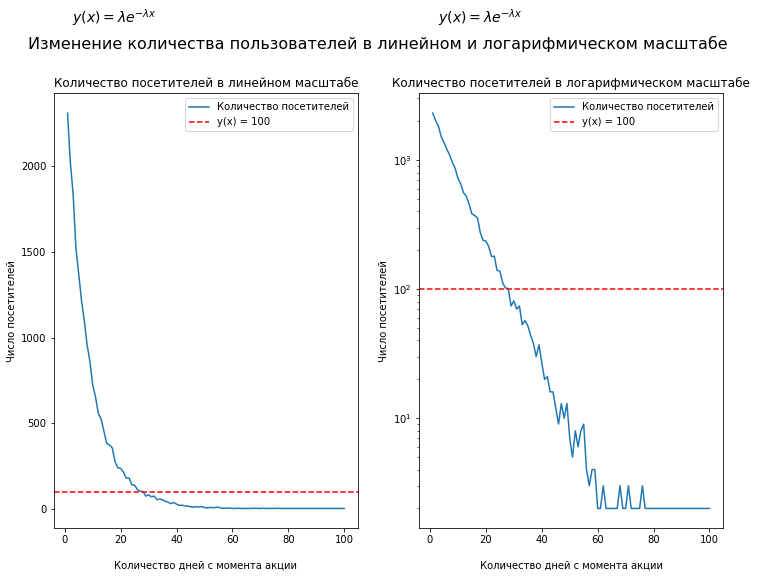

In [47]:
visitors = np.load('visitors.npy')

fig, axs = plt.subplots(ncols=2, figsize=(12,8))
axs[0].set_title("Количество посетителей в линейном масштабе")
axs[0].set_xlabel("Количество дней с момента акции")
axs[0].set_ylabel("Число посетителей")
axs[0].plot(range(1, 101), visitors, label="Количество посетителей")
axs[0].axhline(y=100, color='red', linestyle='--', label="y(x) = 100")
axs[0].legend()
axs[1].set_title("Количество посетителей в логарифмическом масштабе")
axs[1].set_xlabel("Количество дней с момента акции")
axs[1].set_ylabel("Число посетителей")
axs[1].plot(range(1, 101), visitors, label="Количество посетителей")
axs[1].axhline(y=100, color='red', linestyle='--', label="y(x) = 100")
axs[1].legend()
axs[1].set_yscale('log')
for ax in axs:
    ax.text(0.2, 1.15, r"$y(x) = \lambda e^{-\lambda x}$", transform=ax.transAxes,
            ha='center', va='bottom', fontsize=14)
for ax in axs:
    ax.set_xlabel("\nКоличество дней с момента акции")
    ax.set_ylabel("Число посетителей")
fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=16)

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [37]:
recipes = pd.read_csv("recipes_sample.csv")
reviews = pd.read_csv("reviews_sample.csv")
reviews.head()
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

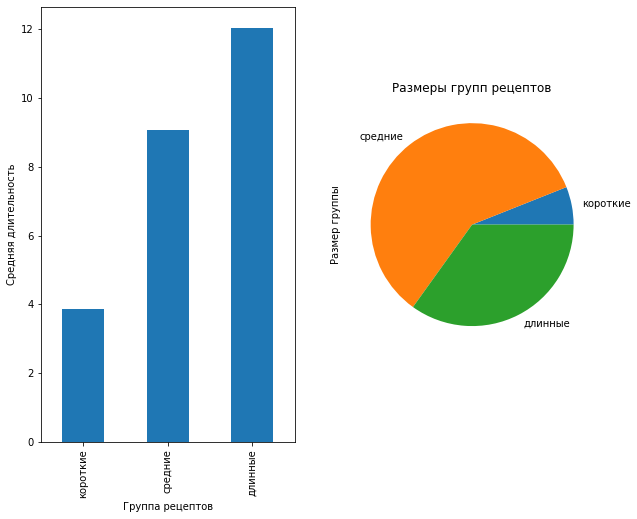

In [46]:
recipe_groups = pd.cut(recipes['minutes'], 
                       bins=[0, 5, 50, float('inf')], 
                       labels=['короткие', 'средние', 'длинные'])

fig, axs = plt.subplots(1, 2, figsize=(10, 8))

grouped_recipes.plot(kind='bar', y='Среднее количество шагов', legend=False, ax=axs[0])
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Средняя длительность')

grouped_recipes.plot(kind='pie', y='Размер группы', legend=False, ax=axs[1])
axs[1].set_title('Размеры групп рецептов')

plt.show()



6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

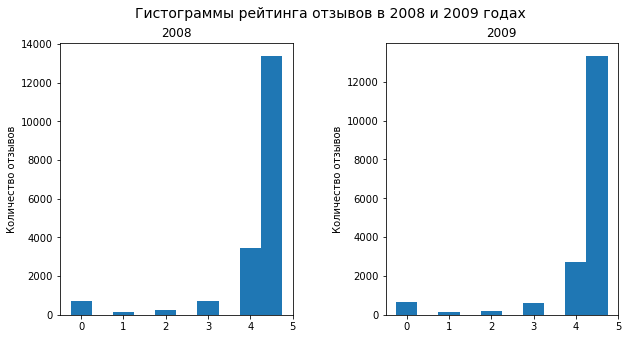

In [45]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews_2008 = reviews[reviews['date'].dt.year ==2008]
reviews_2009 = reviews[reviews['date'].dt.year ==2009]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.4, hspace=0.4) #wspace -расстояние по горизонтали , hspace  - расстояние по вертикали
axs[0].hist(reviews_2008['rating'],  align='left')
axs[1].hist(reviews_2009['rating'],  align='left')

axs[0].set_title('2008')
axs[1].set_title('2009')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14)

axs[0].set_ylabel('Количество отзывов')
axs[1].set_ylabel('Количество отзывов') # Убираем подпись оси y справа

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

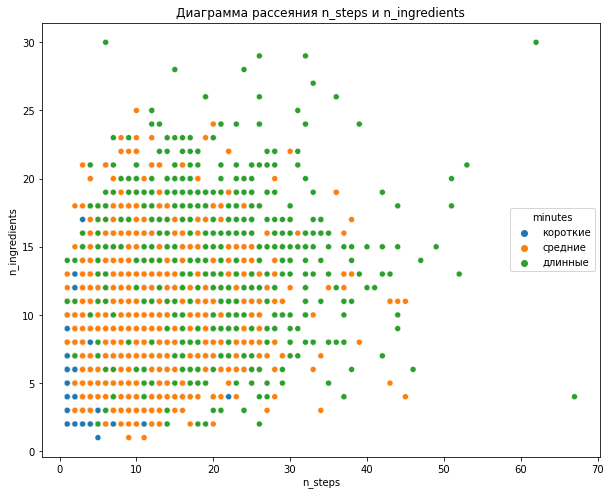

In [42]:
import seaborn as sns
recipe_groups = pd.cut(recipes['minutes'], 
                       bins=[0, 5, 50, float('inf')], 
                       labels=['короткие', 'средние', 'длинные'])
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue=recipe_groups)
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

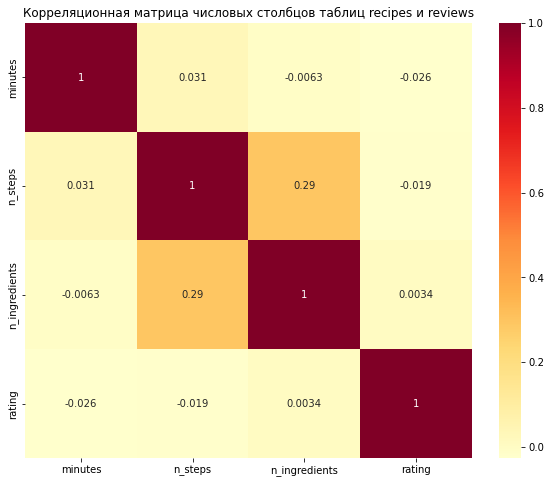

In [40]:
recipes['recipe_id'] = recipes['id']
merge8 = pd.merge(recipes, reviews, on='recipe_id')
column = ['minutes', 'n_steps', 'n_ingredients', 'rating']
matrix = merge8[column].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()